# Step 1 : **Know you dataset**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
from sklearn.datasets import fetch_california_housing

In [134]:
house = fetch_california_housing()
print(house.data.shape)
print(house.target.shape)

(20640, 8)
(20640,)


In [135]:
X = pd.DataFrame(house.data, columns=house.feature_names)
y = pd.Series(house.target)

In [136]:
# Example split: 80% train, 20% test
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [137]:
X_train.isnull().sum()
y_train.isnull().sum()

np.int64(0)

In [128]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [129]:
y_train

,0
14196,1.030
8267,3.821
17445,1.726
14265,0.934
2271,0.965
...,...
11284,2.292
11964,0.978
5390,2.221
860,2.835


In [130]:
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000


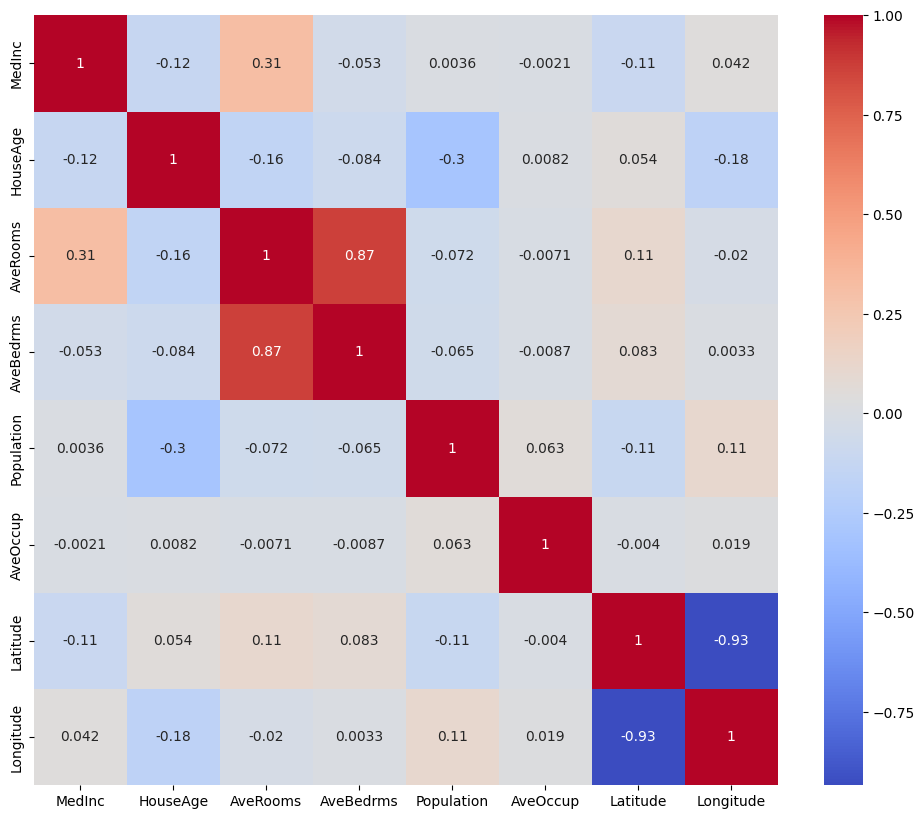

In [138]:
corr = X_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [153]:
# Feature scaling : standardization

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)


# **Standardization**

# **$x'_j = \frac{x_j - \mu_j}{\sigma_j}$**





In [ ]:
X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std

# Step 2 : **Initialize Parameters**

In [155]:
n = X_train_scaled.shape[0] # number of samples (4128)

d = X_train_scaled.shape[1] # number of features (8)

w = np.zeros(d) # initialize weights to zeros

b = 0 # initialize bias to zero

# Step 3 : **Forward pass**

# **$\hat{y} = X \mathbf{w} + b$**


In [156]:
# y_pred = np.dot(X_scaled , w) + b
y_pred = X_train_scaled @ w + b


$\hat{y} = w_1 x_1 + w_2 x_2 + \cdots + w_d x_d + b$

Or in vector form :

$\hat{y} = \mathbf{w}^T \mathbf{x} + b$

Where :

$\mathbf{x} = [x_1, x_2, \dots, x_d]$

and

$\mathbf{w} = [w_1, w_2, \dots, w_d]
$



# Step 4 : **Compute Gradients**

Cost function :

$J(w, b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (w^T x_i + b))^2$

Gradients :

$\frac{\partial J}{\partial w} = -\frac{2}{n} \sum_{i=1}^{n} x_i (y_i - (w^T x_i + b))$

Then :

$\frac{\partial J}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (w^T x_i + b))$

Updating the parameters :

$w \leftarrow w - \alpha \frac{\partial J}{\partial w}, \quad b \leftarrow b - \alpha \frac{\partial J}{\partial b}$

But since **Vectorization** is Much faster :

# $J(w, b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (w^T x_i + b))^2$


#$\frac{\partial J}{\partial w} = -\frac{2}{n} \sum_{i=1}^{n} x_i (y_i - (w^T x_i + b))$


#$\frac{\partial J}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (w^T x_i + b))$


#$w \leftarrow w - \alpha \frac{\partial J}{\partial w}, \quad b \leftarrow b - \alpha \frac{\partial J}{\partial b}$

In [158]:
alpha = .01
tolerance = 1e-7
iter, prev_loss = 0, float('inf')  # Start with an infinitely large loss

losses = []

while True:
    y_pred = X_train_scaled @ w + b
    error = y_pred - y_train

    dw = (2 / n) * X_train_scaled.T @ error
    db = (2 / n) * np.sum(error)

    w -= alpha * dw
    b -= alpha * db

    loss = (1 / n) * np.sum(error ** 2)
    losses.append(loss)

    iter += 1
    print(f"Iteration {iter}: Loss = {loss}")

    # Break if the loss difference is smaller than the tolerance
    if abs(prev_loss - loss) <= tolerance:
        print(f"Converged at iteration {iter}")
        break

    prev_loss = loss


Iteration 1: Loss = 5.3717905222912234
Iteration 2: Loss = 5.183554720108306
Iteration 3: Loss = 5.002874683376145
Iteration 4: Loss = 4.829441923155608
Iteration 5: Loss = 4.662960883410373
Iteration 6: Loss = 4.50314837451179
Iteration 7: Loss = 4.349733033291707
Iteration 8: Loss = 4.202454808279947
Iteration 9: Loss = 4.0610644688408595
Iteration 10: Loss = 3.925323136996087
Iteration 11: Loss = 3.795001840789072
Iteration 12: Loss = 3.6698810881107202
Iteration 13: Loss = 3.549750459965786
Iteration 14: Loss = 3.4344082222158727
Iteration 15: Loss = 3.3236609548878797
Iteration 16: Loss = 3.2173231981864077
Iteration 17: Loss = 3.115217114395379
Iteration 18: Loss = 3.0171721648979863
Iteration 19: Loss = 2.923024801585373
Iteration 20: Loss = 2.832618171963268
Iteration 21: Loss = 2.7458018373023325
Iteration 22: Loss = 2.662431503212352
Iteration 23: Loss = 2.5823687620527944
Iteration 24: Loss = 2.5054808466227643
Iteration 25: Loss = 2.431640394602104
Iteration 26: Loss = 2.36

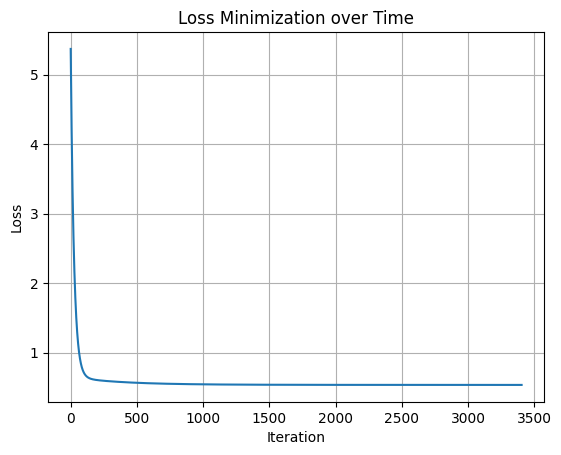

In [159]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Minimization over Time")
plt.grid(True)
plt.show()


In [160]:
loss

np.float64(0.5355927022081717)

In [161]:
y_pred

,0
0,4.140920
1,3.999110
2,3.652802
3,3.239452
4,2.380111
...,...
16507,1.709248
16508,1.556594
16509,1.726349
16510,1.416577


Step 6 :

In [162]:
y_pred = X_test_scaled @ w + b
error = y_test - y_pred
loss = (1/n) * np.sum(error**2)

In [163]:
loss

np.float64(0.12385413755480669)

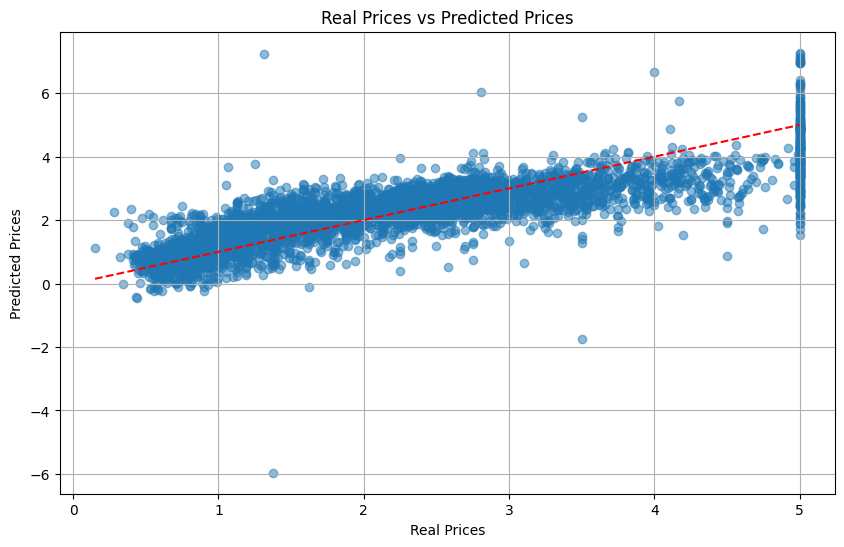

In [165]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Real Prices")
plt.ylabel("Predicted Prices")
plt.title("Real Prices vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line for reference
plt.grid(True)
plt.show()
